### Load  Data

In [1]:
import pandas as pd

In [2]:
# https://ec.europa.eu/eurostat/databrowser/view/aact_eaa01/default/table?lang=uk
df = pd.read_csv('estat_aact_eaa01_defaultview_en.csv')

In [3]:
df

,DATAFLOW,LAST UPDATE,freq,itm_newa,indic_ag,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:AACT_EAA01$DEFAULTVIEW(1.0),09/04/21 23:00:00,A,1000,PROD_BP,MIO_EUR,AT,2011,906.72,NaN
1,ESTAT:AACT_EAA01$DEFAULTVIEW(1.0),09/04/21 23:00:00,A,1000,PROD_BP,MIO_EUR,AT,2012,1029.21,NaN
2,ESTAT:AACT_EAA01$DEFAULTVIEW(1.0),09/04/21 23:00:00,A,1000,PROD_BP,MIO_EUR,AT,2013,717.58,NaN
3,ESTAT:AACT_EAA01$DEFAULTVIEW(1.0),09/04/21 23:00:00,A,1000,PROD_BP,MIO_EUR,AT,2014,769.41,NaN
4,ESTAT:AACT_EAA01$DEFAULTVIEW(1.0),09/04/21 23:00:00,A,1000,PROD_BP,MIO_EUR,AT,2015,728.38,NaN
...,...,...,...,...,...,...,...,...,...,...
393,ESTAT:AACT_EAA01$DEFAULTVIEW(1.0),09/04/21 23:00:00,A,1000,PROD_BP,MIO_EUR,UK,2016,3041.62,NaN
394,ESTAT:AACT_EAA01$DEFAULTVIEW(1.0),09/04/21 23:00:00,A,1000,PROD_BP,MIO_EUR,UK,2017,3524.67,NaN
395,ESTAT:AACT_EAA01$DEFAULTVIEW(1.0),09/04/21 23:00:00,A,1000,PROD_BP,MIO_EUR,UK,2018,3675.30,NaN
396,ESTAT:AACT_EAA01$DEFAULTVIEW(1.0),09/04/21 23:00:00,A,1000,PROD_BP,MIO_EUR,UK,2019,4177.58,NaN


## Prepare data

In [4]:
df.columns

Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'itm_newa', 'indic_ag', 'unit',
       'geo', 'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG'],
      dtype='object')

In [5]:
col = df.columns[6:-1]
col

Index(['geo', 'TIME_PERIOD', 'OBS_VALUE'], dtype='object')

In [6]:
df = df[col]
df

,geo,TIME_PERIOD,OBS_VALUE
0,AT,2011,906.72
1,AT,2012,1029.21
2,AT,2013,717.58
3,AT,2014,769.41
4,AT,2015,728.38
...,...,...,...
393,UK,2016,3041.62
394,UK,2017,3524.67
395,UK,2018,3675.30
396,UK,2019,4177.58


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   geo          398 non-null    object 
 1   TIME_PERIOD  398 non-null    int64  
 2   OBS_VALUE    398 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.5+ KB


In [8]:
df = df.astype({'geo':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   geo          398 non-null    category
 1   TIME_PERIOD  398 non-null    int64   
 2   OBS_VALUE    398 non-null    float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 8.1 KB


In [9]:
# Unique countries
df['geo'].unique()

['AT', 'BE', 'BG', 'CH', 'CY', ..., 'RO', 'SE', 'SI', 'SK', 'UK']
Length: 40
Categories (40, object): ['AT', 'BE', 'BG', 'CH', ..., 'SE', 'SI', 'SK', 'UK']

In [10]:
df['geo'] = df['geo'].cat.add_categories(["GB", "GR"])

In [11]:
# Replace UK to GB
pd.options.mode.chained_assignment = None  # turn warnings
mask = df['geo'] == 'UK' # preddicat 
df.loc[mask, 'geo'] = "GB" # replacement
df

,geo,TIME_PERIOD,OBS_VALUE
0,AT,2011,906.72
1,AT,2012,1029.21
2,AT,2013,717.58
3,AT,2014,769.41
4,AT,2015,728.38
...,...,...,...
393,GB,2016,3041.62
394,GB,2017,3524.67
395,GB,2018,3675.30
396,GB,2019,4177.58


In [12]:
# Replace EL to GR
mask = df['geo'] == 'EL'
df.loc[mask, 'geo'] = 'GR'
df

,geo,TIME_PERIOD,OBS_VALUE
0,AT,2011,906.72
1,AT,2012,1029.21
2,AT,2013,717.58
3,AT,2014,769.41
4,AT,2015,728.38
...,...,...,...
393,GB,2016,3041.62
394,GB,2017,3524.67
395,GB,2018,3675.30
396,GB,2019,4177.58


### Add country name and filter invalid countries

In [13]:
import pycountry

In [14]:
list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]  # створення списку кодів країн
print("Country codes", list_alpha_2)

def country_flag(df):
    '''
    df: Series
    return: Full name of country or "Invalide code"
    '''
    if (df['geo'] in list_alpha_2):
        return pycountry.countries.get(alpha_2=df['geo']).name
    else:
        print(df['geo'])
        return 'Invalid Code'

df['country_name']=df.apply(country_flag, axis = 1)
df

Country codes ['AW', 'AF', 'AO', 'AI', 'AX', 'AL', 'AD', 'AE', 'AR', 'AM', 'AS', 'AQ', 'TF', 'AG', 'AU', 'AT', 'AZ', 'BI', 'BE', 'BJ', 'BQ', 'BF', 'BD', 'BG', 'BH', 'BS', 'BA', 'BL', 'BY', 'BZ', 'BM', 'BO', 'BR', 'BB', 'BN', 'BT', 'BV', 'BW', 'CF', 'CA', 'CC', 'CH', 'CL', 'CN', 'CI', 'CM', 'CD', 'CG', 'CK', 'CO', 'KM', 'CV', 'CR', 'CU', 'CW', 'CX', 'KY', 'CY', 'CZ', 'DE', 'DJ', 'DM', 'DK', 'DO', 'DZ', 'EC', 'EG', 'ER', 'EH', 'ES', 'EE', 'ET', 'FI', 'FJ', 'FK', 'FR', 'FO', 'FM', 'GA', 'GB', 'GE', 'GG', 'GH', 'GI', 'GN', 'GP', 'GM', 'GW', 'GQ', 'GR', 'GD', 'GL', 'GT', 'GF', 'GU', 'GY', 'HK', 'HM', 'HN', 'HR', 'HT', 'HU', 'ID', 'IM', 'IN', 'IO', 'IE', 'IR', 'IQ', 'IS', 'IL', 'IT', 'JM', 'JE', 'JO', 'JP', 'KZ', 'KE', 'KG', 'KH', 'KI', 'KN', 'KR', 'KW', 'LA', 'LB', 'LR', 'LY', 'LC', 'LI', 'LK', 'LS', 'LT', 'LU', 'LV', 'MO', 'MF', 'MA', 'MC', 'MD', 'MG', 'MV', 'MX', 'MH', 'MK', 'ML', 'MT', 'MM', 'ME', 'MN', 'MP', 'MZ', 'MR', 'MS', 'MQ', 'MU', 'MW', 'MY', 'YT', 'NA', 'NC', 'NE', 'NF', 'NG', '

,geo,TIME_PERIOD,OBS_VALUE,country_name
0,AT,2011,906.72,Austria
1,AT,2012,1029.21,Austria
2,AT,2013,717.58,Austria
3,AT,2014,769.41,Austria
4,AT,2015,728.38,Austria
...,...,...,...,...
393,GB,2016,3041.62,United Kingdom
394,GB,2017,3524.67,United Kingdom
395,GB,2018,3675.30,United Kingdom
396,GB,2019,4177.58,United Kingdom


In [15]:
# Filter invalid countries
mask = df['country_name'] != 'Invalid Code'
df = df[mask]
df

,geo,TIME_PERIOD,OBS_VALUE,country_name
0,AT,2011,906.72,Austria
1,AT,2012,1029.21,Austria
2,AT,2013,717.58,Austria
3,AT,2014,769.41,Austria
4,AT,2015,728.38,Austria
...,...,...,...,...
393,GB,2016,3041.62,United Kingdom
394,GB,2017,3524.67,United Kingdom
395,GB,2018,3675.30,United Kingdom
396,GB,2019,4177.58,United Kingdom


## Static analysis

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 0 to 397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   geo           309 non-null    category
 1   TIME_PERIOD   309 non-null    int64   
 2   OBS_VALUE     309 non-null    float64 
 3   country_name  309 non-null    object  
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [17]:
df.describe()

,TIME_PERIOD,OBS_VALUE
count,309.000000,309.000000
mean,2015.485437,1684.335372
std,2.870124,2447.400596
min,2011.000000,0.000000
25%,2013.000000,305.910000
50%,2015.000000,618.380000
75%,2018.000000,2105.540000
max,2020.000000,14639.300000


In [18]:
df.loc[:, 'country_name'] = df['country_name'].astype('category')
df.describe(include=['category'])

,geo
count,309
unique,31
top,AT
freq,10


In [19]:
df['country_name'].value_counts()

country_name
Austria           10
Belgium           10
Slovakia          10
Slovenia          10
Sweden            10
Romania           10
Portugal          10
Poland            10
Norway            10
Netherlands       10
Malta             10
Latvia            10
Luxembourg        10
Lithuania         10
Italy             10
Ireland           10
Hungary           10
Croatia           10
France            10
Finland           10
Spain             10
Greece            10
Estonia           10
Denmark           10
Germany           10
Czechia           10
Cyprus            10
Switzerland       10
Bulgaria          10
United Kingdom    10
Iceland            9
Name: count, dtype: int64

### Statistics by country

In [20]:
# Pivot table
pt_country = pd.pivot_table(df, values= 'OBS_VALUE', index= ['TIME_PERIOD'], columns=['country_name'], aggfunc='sum', margins=True)
pt_country

country_name,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,...,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden,Switzerland,United Kingdom,All
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,
2011,906.72,465.34,1196.06,625.99,10.01,1329.91,1695.62,125.76,601.77,12037.10,...,4717.27,291.47,4655.20,580.49,105.63,4449.25,791.98,314.30,3721.82,57188.81
2012,1029.21,606.09,1311.49,653.97,10.71,1286.80,1949.76,208.32,665.96,14639.30,...,5070.93,329.30,2807.10,594.15,109.00,4011.10,971.59,308.64,3947.35,59484.23
2013,717.58,513.17,1258.57,448.45,12.52,1252.84,1302.19,146.18,703.70,11852.50,...,4361.35,289.74,4500.89,568.01,77.30,4421.59,757.95,279.29,3962.17,56253.90
2014,769.41,451.63,1330.84,375.81,1.83,1233.46,1357.07,175.88,543.32,11206.60,...,4107.91,279.18,3852.86,614.85,90.95,3586.85,800.76,303.51,4265.67,53144.34
2015,728.38,453.76,1228.73,315.34,18.65,1207.39,1629.77,211.29,491.85,11220.90,...,3545.09,277.13,3316.34,568.71,87.01,3607.41,756.03,347.50,3929.88,50860.75
2016,749.33,305.91,1199.37,365.05,3.20,1158.70,1129.68,111.69,446.44,8003.17,...,3530.89,247.65,3448.48,618.38,82.79,3841.08,695.80,276.16,3041.62,44155.50
2017,754.07,376.77,1246.43,323.85,7.18,1085.51,1358.64,175.90,447.14,9846.95,...,4031.34,235.65,4054.52,450.25,75.83,2966.52,755.35,341.44,3524.67,47270.32
2018,776.49,417.79,1443.72,399.05,5.84,1180.00,1327.51,149.05,443.33,10763.15,...,3660.41,241.69,4877.45,575.64,85.79,4342.57,577.17,298.10,3675.30,49558.14
2019,801.11,435.90,1499.80,393.12,11.94,1219.29,1301.14,222.01,652.18,10793.12,...,3959.36,240.92,4764.68,583.05,84.76,3643.10,775.69,339.63,4177.58,52390.33


In [21]:
pt_country.describe()

country_name,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,...,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden,Switzerland,United Kingdom,All
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1475.725455,820.181818,2357.914545,783.092727,17.329091,2214.525455,2587.932727,319.236364,993.423636,19972.169091,...,7530.029091,484.834545,7179.083636,1048.616364,162.690909,7193.789091,1400.718182,576.990909,6813.669091,94629.023636
std,2204.483515,1226.438260,3520.482806,1174.016529,26.310411,3305.763783,3870.014098,478.085028,1485.794645,29854.753610,...,11248.804433,724.229646,10737.282092,1565.712932,243.040474,10748.271046,2092.649345,861.614595,10176.130605,141301.778685
min,717.580000,305.910000,1196.060000,315.340000,1.830000,1085.510000,1129.680000,111.690000,443.330000,8003.170000,...,3530.890000,233.860000,2807.100000,450.250000,75.830000,2966.520000,577.170000,276.160000,3041.620000,44155.500000
25%,751.700000,426.845000,1237.580000,370.430000,6.510000,1193.695000,1301.665000,147.615000,457.640000,10305.050000,...,3809.885000,241.305000,3382.410000,572.175000,83.775000,3625.255000,755.690000,300.805000,3599.985000,49855.725000
50%,776.490000,453.760000,1258.570000,399.050000,10.710000,1225.990000,1357.070000,175.900000,543.320000,11206.600000,...,4107.910000,277.130000,4054.520000,583.050000,87.010000,4011.100000,775.690000,314.300000,3929.880000,52390.330000
75%,895.455000,498.905000,1387.280000,537.220000,12.975000,1269.820000,1662.695000,216.650000,659.070000,11944.800000,...,4573.940000,290.605000,4709.940000,614.355000,100.685000,4435.420000,811.195000,344.470000,4069.875000,56721.355000
max,8116.490000,4511.000000,12968.530000,4307.010000,95.310000,12179.890000,14233.630000,1755.800000,5463.830000,109846.930000,...,41415.160000,2666.590000,39484.960000,5767.390000,894.800000,39565.840000,7703.950000,3173.450000,37475.180000,520459.630000


### Statistics for the year

In [22]:
pt = pd.pivot_table(df, values= 'OBS_VALUE', index= ['country_name'], columns=['TIME_PERIOD'], aggfunc='sum', margins=True)
pt

TIME_PERIOD,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
country_name,,,,,,,,,,,
Austria,906.72,1029.21,717.58,769.41,728.38,749.33,754.07,776.49,801.11,884.19,8116.49
Belgium,465.34,606.09,513.17,451.63,453.76,305.91,376.77,417.79,435.90,484.64,4511.00
Bulgaria,1196.06,1311.49,1258.57,1330.84,1228.73,1199.37,1246.43,1443.72,1499.80,1253.52,12968.53
Croatia,625.99,653.97,448.45,375.81,315.34,365.05,323.85,399.05,393.12,406.38,4307.01
Cyprus,10.01,10.71,12.52,1.83,18.65,3.20,7.18,5.84,11.94,13.43,95.31
Czechia,1329.91,1286.80,1252.84,1233.46,1207.39,1158.70,1085.51,1180.00,1219.29,1225.99,12179.89
Denmark,1695.62,1949.76,1302.19,1357.07,1629.77,1129.68,1358.64,1327.51,1301.14,1182.25,14233.63
Estonia,125.76,208.32,146.18,175.88,211.29,111.69,175.90,149.05,222.01,229.72,1755.80
Finland,601.77,665.96,703.70,543.32,491.85,446.44,447.14,443.33,652.18,468.14,5463.83


In [23]:
pt.describe()

TIME_PERIOD,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,31.000000,32.000000
mean,3574.300625,3717.764375,3515.868750,3321.521250,3178.796875,2759.718750,2954.395000,3097.383750,3274.395625,3235.697419,32528.726875
std,10144.031208,10601.865827,9991.616532,9425.947104,9023.478006,7786.425098,8376.445304,8785.478484,9276.384250,8987.288386,92231.362313
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,308.592500,372.695000,313.515000,308.790000,334.135000,274.007500,312.282500,290.840000,335.530000,350.400000,3416.952500
50%,656.430000,818.775000,710.640000,692.130000,648.545000,657.090000,587.605000,576.405000,678.155000,731.260000,6735.670000
75%,2721.657500,2280.930000,2678.357500,2677.955000,2379.815000,2428.060000,2240.527500,2593.782500,2636.307500,2740.215000,26034.447500
max,57188.810000,59484.230000,56253.900000,53144.340000,50860.750000,44155.500000,47270.320000,49558.140000,52390.330000,50153.310000,520459.630000


## Data Visualization

<Axes: xlabel='TIME_PERIOD'>

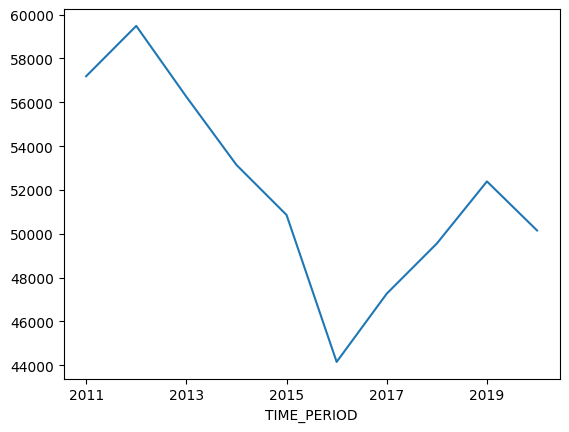

In [24]:
# Last column chart
pt.iloc[-1][:-1].plot()

<Axes: xlabel='country_name'>

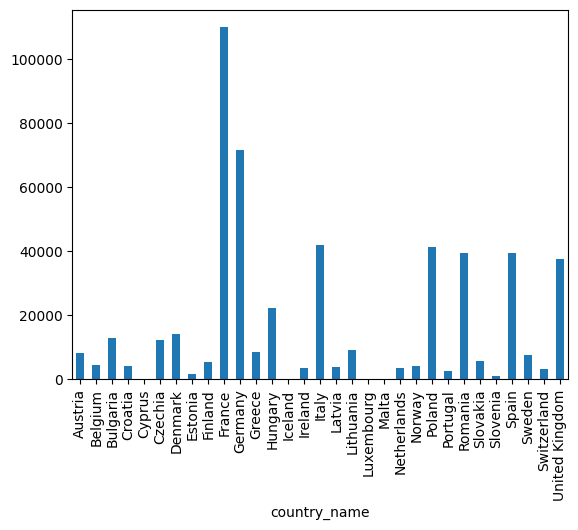

In [25]:
# Countries bar chart except last row 
pt['All'][:-1].plot.bar(x='country_name', y='val', rot=90)

<Axes: xlabel='TIME_PERIOD'>

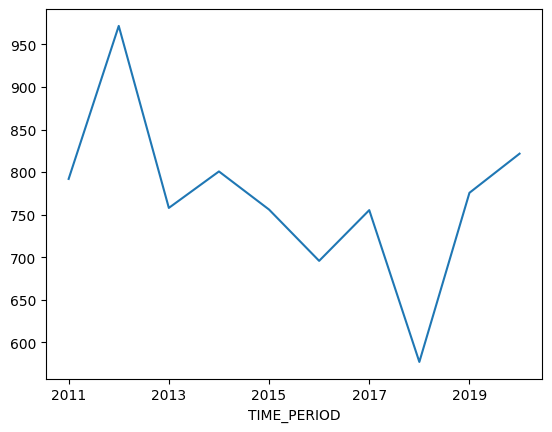

In [26]:
# Sweden economic chart
pt.loc['Sweden'][:-1].plot()

### Economic comparison of Germany and France

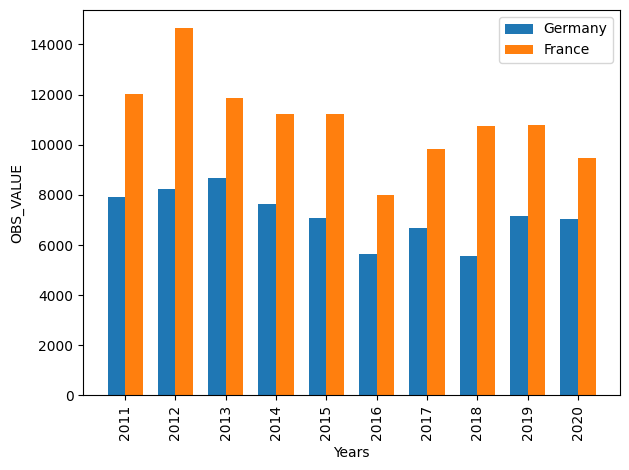

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(pt.columns)-1)
width = 0.35  # column width

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pt.loc['Germany'][:-1], width, label='Germany') # параметри стовпців
rects2 = ax.bar(x + width/2, pt.loc['France'][:-1], width, label='France')

# Labels
ax.set_ylabel('OBS_VALUE')
ax.set_xlabel('Years')
ax.set_xticks(x)
plt.xticks(rotation = 90)
ax.set_xticklabels(pt.columns[:-1])
ax.legend()

fig.tight_layout()

plt.show()

             Sweden
TIME_PERIOD        
2011         791.98
2012         971.59
2013         757.95
2014         800.76
2015         756.03
2016         695.80
2017         755.35
2018         577.17
2019         775.69
2020         821.63


<Axes: xlabel='TIME_PERIOD', ylabel='Sweden'>

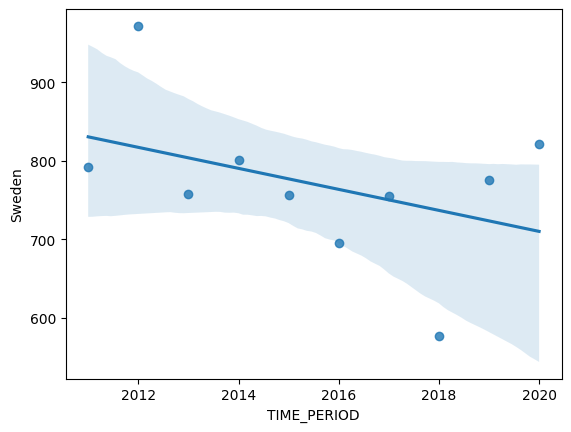

In [28]:
import seaborn as sns
d = pd.DataFrame(pt.loc['Sweden'][:-1])
d.index = d.index.astype('int')
print(d)
sns.regplot(x=d.index, y="Sweden", data=d,)

## Build a trend line

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Build LR model
X = np.reshape(d.index, (-1, 1)) # transform X values
y = np.reshape(d.values, (-1, 1)) # transform Y values
model.fit(X, y)

LinearRegression()

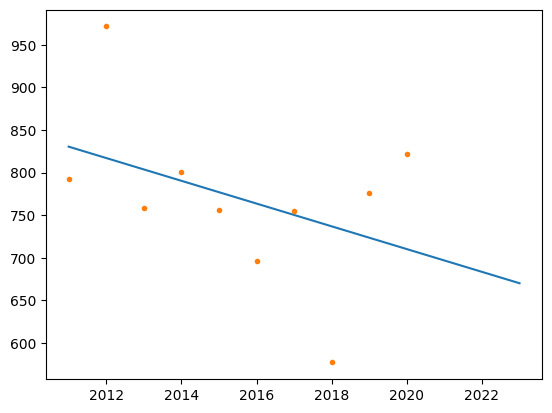

In [30]:
# Check prediction
X_pred= np.append(X, [2021, 2022, 2023])
X_pred = np.reshape(X_pred, (-1, 1))
# calculate trend
trend = model.predict(X_pred)

plt.plot(X_pred, trend, "-", X, y, ".")

## Interactive Maps

In [31]:
import plotly.express as px

In [32]:
df

,geo,TIME_PERIOD,OBS_VALUE,country_name
0,AT,2011,906.72,Austria
1,AT,2012,1029.21,Austria
2,AT,2013,717.58,Austria
3,AT,2014,769.41,Austria
4,AT,2015,728.38,Austria
...,...,...,...,...
393,GB,2016,3041.62,United Kingdom
394,GB,2017,3524.67,United Kingdom
395,GB,2018,3675.30,United Kingdom
396,GB,2019,4177.58,United Kingdom


### Load polygons

In [36]:
import json
#!wget european-union-countries.geojson "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-agriculture-basic-statistical-analysis-and-geo-visualisation/european-union-countries.geojson"
with open("european-union-countries.geojson", encoding="utf8") as json_file:
    EU_map = json.load(json_file)


### Build choropleth

In [34]:
fig = px.choropleth(
    df,
    geojson=EU_map,
    locations='country_name',
    featureidkey='properties.name',    
    color= 'OBS_VALUE', 
    scope='europe',
    hover_name= 'country_name',
    hover_data= ['country_name', 'OBS_VALUE'],
    animation_frame= 'TIME_PERIOD', 
    color_continuous_scale=px.colors.diverging.RdYlGn[::-1]
)

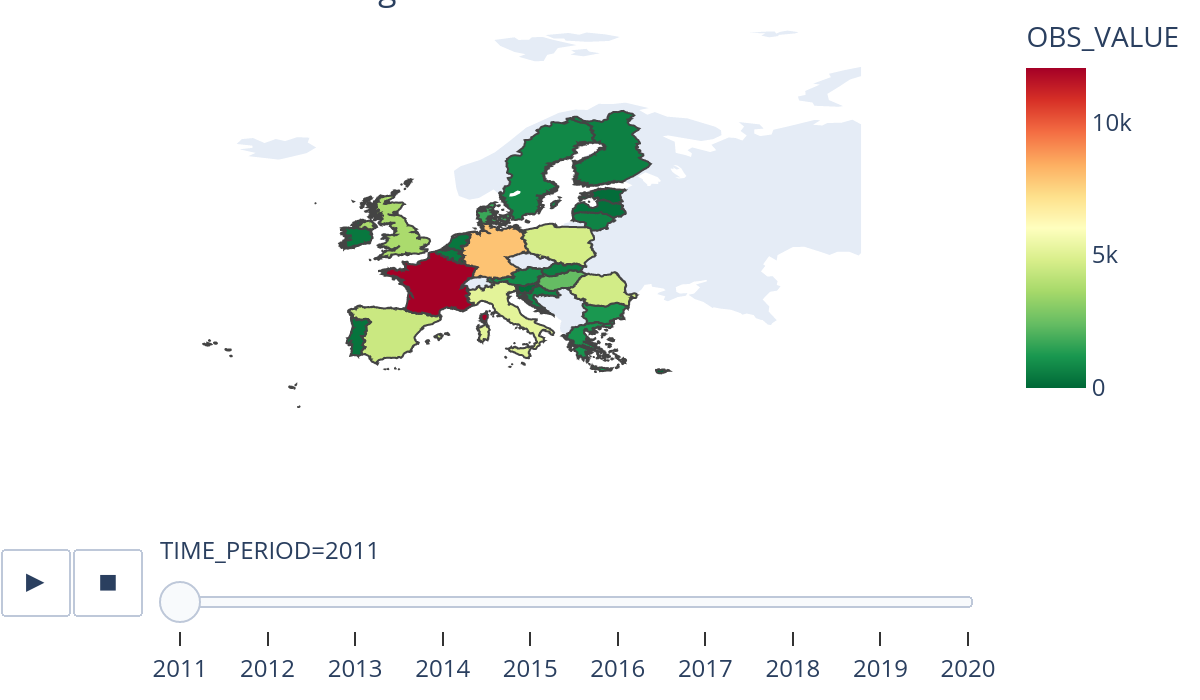

In [38]:
fig.update_geos(showcountries=False, showcoastlines=False, showland=True, fitbounds=False)

fig.update_layout(
    title_text ="Agriculture Economic accounts",
    title_x = 0.5,
    geo= dict(
        showframe= True,
        showcoastlines= False,
        projection_type = 'equirectangular'
    ),
    margin={"r":0,"t":0,"l":0,"b":0}
)
import plotly.io as pio

from IPython.display import Image
Image(fig.to_image(format="png", width=600, height=350, scale=2))